In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = pd.read_csv('dataframe/champions.csv')

### Multiclass classifier 1X2

In [177]:
# Crear la nueva columna "Victoria" en función de los resultados de los partidos 1 si ganaa el equipo local, 0 si hay empate y 2 si gana el equipo visitante
df['Victoria'] = df.apply(lambda row: 1 if row['VictoriaLocal'] == 1 else (3 if row['Empate'] == 1 else 2), axis=1)

# Visualizar las primeras filas del DataFrame para verificar los cambios
df.head()

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Victoria
0,125,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422,1
1,126,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148,1
2,127,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168,2
3,128,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874,1
4,129,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387,3


In [178]:
df = df.drop(['Temporada', 'Ronda', 'Evento'], axis=1)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idPartido             2494 non-null   int64  
 1   Local                 2494 non-null   int64  
 2   Visitante             2494 non-null   int64  
 3   GolesLocal            2494 non-null   int64  
 4   GolesVisitante        2494 non-null   int64  
 5   VictoriaLocal         2494 non-null   int64  
 6   Empate                2494 non-null   int64  
 7   VictoriaVisitante     2494 non-null   int64  
 8   %_Victorias_Local     2494 non-null   float64
 9   %_Empate              2494 non-null   float64
 10  %_Victoria_Visitante  2494 non-null   float64
 11  %_Equipo1_Ganado      2494 non-null   float64
 12  %_Equipo2_Ganado      2494 non-null   float64
 13  %_1_G_Temporada       2494 non-null   float64
 14  %_1_G_Temporada_L     2494 non-null   float64
 15  %_1_E_Temporada_L    

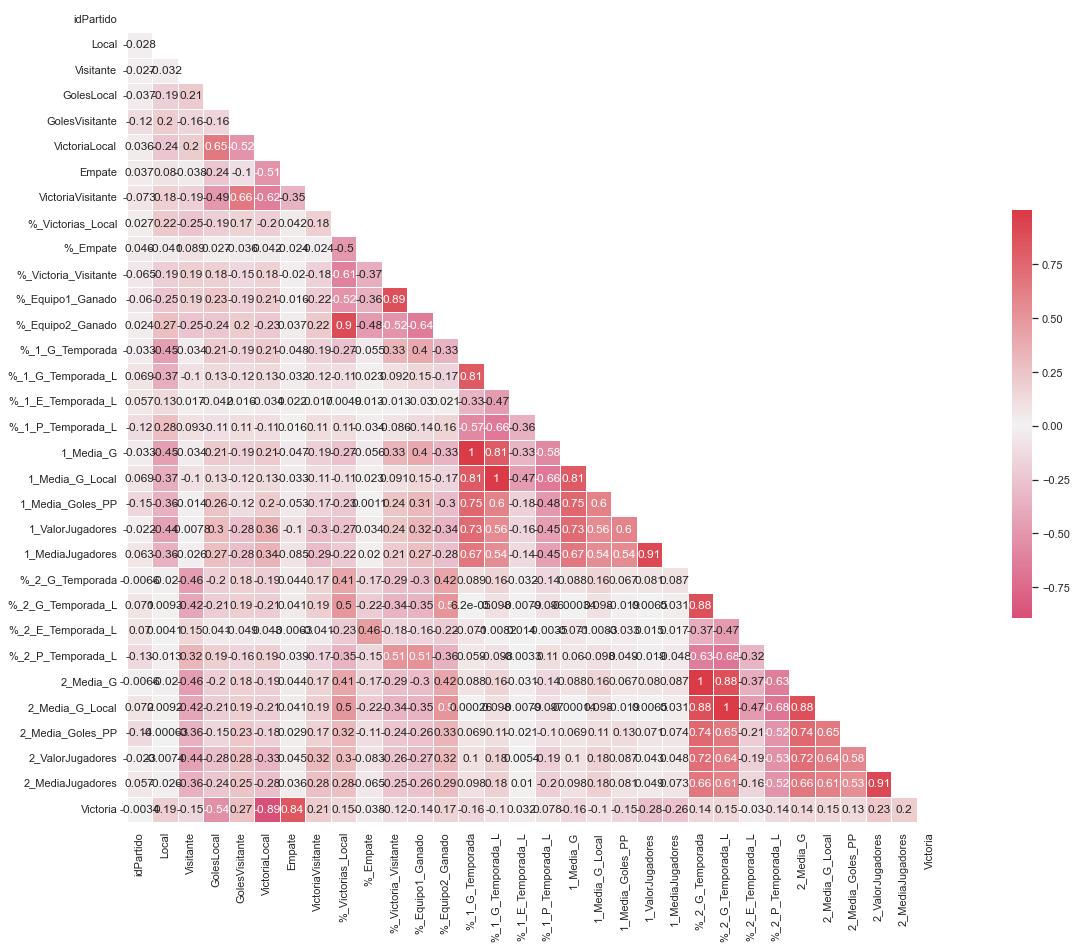

In [180]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(25, 15))
sns.set(style='white')

mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(matriz_correlacion,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

In [181]:
import pandas as pd

# Suponiendo que tu conjunto de datos se llama "data" y la columna de la variable objetivo es "Victoria"
correlation_with_victory = df.corr()["Victoria"].sort_values(ascending=False)

correlation_with_victory


Victoria                1.000000
Empate                  0.842783
GolesVisitante          0.268363
2_ValorJugadores        0.228201
VictoriaVisitante       0.207079
2_MediaJugadores        0.195943
Local                   0.189603
%_Equipo2_Ganado        0.166120
2_Media_G_Local         0.151552
%_2_G_Temporada_L       0.151419
%_Victorias_Local       0.147386
%_2_G_Temporada         0.142907
2_Media_G               0.142833
2_Media_Goles_PP        0.131181
%_1_P_Temporada_L       0.078215
%_1_E_Temporada_L       0.032340
idPartido              -0.003355
%_2_E_Temporada_L      -0.030249
%_Empate               -0.038390
1_Media_G_Local        -0.099925
%_1_G_Temporada_L      -0.100151
%_Victoria_Visitante   -0.122285
%_2_P_Temporada_L      -0.137429
%_Equipo1_Ganado       -0.142771
Visitante              -0.147003
1_Media_Goles_PP       -0.154145
%_1_G_Temporada        -0.157819
1_Media_G              -0.157879
1_MediaJugadores       -0.258103
1_ValorJugadores       -0.276975
GolesLocal

In [182]:
from sklearn.model_selection import train_test_split

partido_features = df.drop(['idPartido', 'Victoria', 'GolesLocal', 'GolesVisitante', 'VictoriaLocal', 'VictoriaVisitante', 'Empate'], axis=1).columns
objetivo = 'Victoria'

# Separate features and labels
partidos_X = df[partido_features].values
partidos_y = df[objetivo].values


# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(partidos_X, partidos_y,
                                                    test_size=0.30,
                                                    random_state=0,
                                                    stratify=partidos_y)

print ('Training Set: %d, Test Set: %d \n' % (x_train.shape[0], x_test.shape[0]))

Training Set: 1745, Test Set: 749 



In [183]:
from sklearn.linear_model import LogisticRegression

multi_model = LogisticRegression(solver='liblinear', max_iter=10000)
multi_model.fit(x_train, y_train)
print (multi_model)

LogisticRegression(max_iter=10000, solver='liblinear')


In [184]:
# Realizar predicciones en el conjunto de prueba
predictions = multi_model.predict(x_test)

# Imprimir las etiquetas predichas y las etiquetas reales para las primeras 15 muestras del conjunto de prueba
print('Etiquetas predichas:', predictions[:15])
print('Etiquetas reales:   ', y_test[:15])


Etiquetas predichas: [1 2 1 1 1 1 2 2 1 1 1 2 1 1 2]
Etiquetas reales:    [1 2 1 2 2 1 3 2 2 1 1 2 1 1 1]


Métricas de evaluación del modelo

In [185]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.65      0.89      0.75       356
           2       0.58      0.66      0.62       225
           3       0.12      0.01      0.01       168

    accuracy                           0.62       749
   macro avg       0.45      0.52      0.46       749
weighted avg       0.51      0.62      0.55       749



- Precision: Para la clase 0, la precisión es baja (0.21), lo que indica que de todas las predicciones positivas para la clase 0, solo el 21% fueron realmente correctas. Para la clase 1, la precisión es mucho mejor (0.64), lo que indica que el 64% de las predicciones positivas para la clase 1 fueron correctas. Para la clase 2, la precisión es moderada (0.57), lo que indica que el 57% de las predicciones positivas para la clase 2 fueron correctas.

- Recall (Recuperación): Para la clase 0, el recall es muy bajo (0.02), lo que indica que solo se identificaron correctamente el 2% de todas las instancias de la clase 0. Para la clase 1, el recall es alto (0.81), lo que indica que se identificaron correctamente el 81% de todas las instancias de la clase 1. Para la clase 2, el recall también es alto (0.71), lo que indica que se identificaron correctamente el 71% de todas las instancias de la clase 2.

- F1-score: La puntuación F1 es una medida que combina precisión y recuperación en un solo número. Para la clase 0, el F1-score es muy bajo (0.03), lo que indica un bajo equilibrio entre precisión y recuperación. Para las clases 1 y 2, los F1-scores son más altos (0.72 y 0.63 respectivamente), lo que indica un mejor equilibrio entre precisión y recuperación en estas clases.

- Accuracy (Precisión global): La precisión global del modelo en todas las clases es del 60%, lo que indica que el 60% de las predicciones fueron correctas en general.

En general, estos resultados muestran que el modelo tiene dificultades para clasificar correctamente la clase 0, ya que tiene un recall muy bajo y una precisión baja. Sin embargo, para las clases 1 y 2, el modelo tiene un mejor rendimiento en términos de precisión, recall y F1-score.

In [186]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))


Overall Accuracy: 0.6221628838451269
Overall Precision: 0.45225456208772696
Overall Recall: 0.5186050175376018


In [187]:
#Imprimimos la matriz de confusión
from sklearn.metrics import confusion_matrix

m = confusion_matrix(y_test, predictions)
print(m)

[[316  38   2]
 [ 71 149   5]
 [ 96  71   1]]


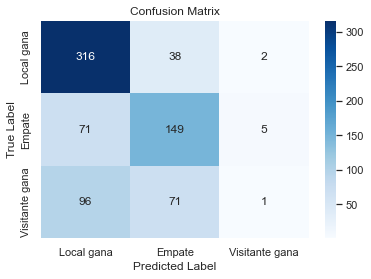

In [188]:

# Definir las clases de los partidos
partido_classes = ['Local gana', 'Empate', 'Visitante gana']

# Mostrar la matriz de confusión utilizando seaborn
sns.heatmap(m, annot=True, fmt='d', cmap='Blues', xticklabels=partido_classes, yticklabels=partido_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

En el caso de un modelo de clasificación multiclase, no es posible mostrar una única curva ROC que muestre la tasa de verdaderos positivos frente a la tasa de falsos positivos. Sin embargo, puedes utilizar las tasas para cada clase en una comparación Uno vs. Resto (OVR) para crear un gráfico ROC para cada clase.

/Users/carlotasanchezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


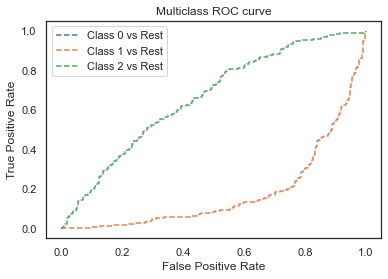

In [189]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Obtener las probabilidades de clase
partidos_prob = multi_model.predict_proba(x_test)

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(multi_model.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(multi_model.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

Como vemos este modelo no es muy bueno interpreto que porque hay una diferencia muy grande de muestras para cada clase. Para ello, utilizare otros modelos como random forest o gradient boosting que son útiles para manejar desbalanceo de clases. 

In [190]:
auc = roc_auc_score(y_test, partidos_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.7452095168746994


Promedio de los AUC obtenidos para cada clase individualmente mediante un enfoque OVR, en este caso sugiere que el modelo tiene un buen rendimiento en términos de capacidad discriminativa en general.

### Random Forest

Accuracy: 0.6248331108144193

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.83      0.76       356
           2       0.58      0.66      0.62       225
           3       0.34      0.13      0.19       168

    accuracy                           0.62       749
   macro avg       0.54      0.54      0.52       749
weighted avg       0.58      0.62      0.59       749



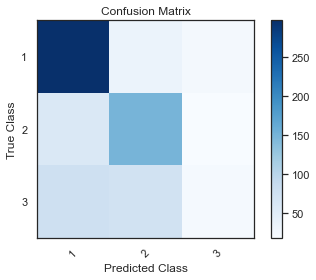

/Users/carlotasanchezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


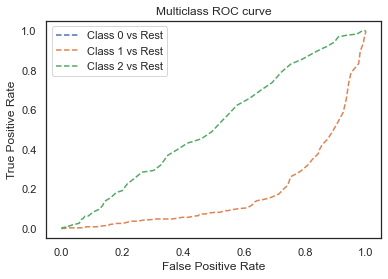

In [191]:
from sklearn.ensemble import RandomForestClassifier


# Crear y entrenar el modelo Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = random_forest_model.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Mostrar el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Visualizar la matriz de confusión
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

# Obtener las probabilidades de clase
partidos_prob = random_forest_model.predict_proba(x_test)

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(random_forest_model.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(random_forest_model.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


Con este modelo vemos que los resultados mejoran. Ahora voy a probar con Gradient Boosting este modelo puede ser bueno para mi trabajo.

#### Gradient Boosting

Accuracy: 0.6582109479305741
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.86      0.77       356
           2       0.65      0.71      0.68       225
           3       0.44      0.17      0.24       168

    accuracy                           0.66       749
   macro avg       0.59      0.58      0.56       749
weighted avg       0.62      0.66      0.62       749



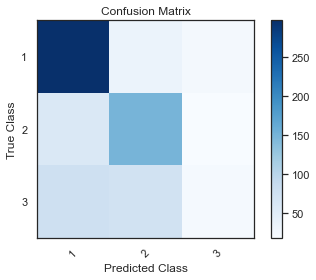

/Users/carlotasanchezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


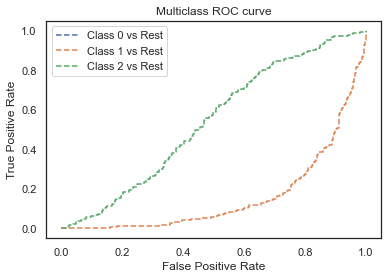

In [192]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar y ajustar el modelo Gradient Boosting
modelo_gb = GradientBoostingClassifier()
modelo_gb.fit(x_train, y_train)

# Realizar predicciones
predicciones = modelo_gb.predict(x_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Accuracy:", precision)

# Mostrar el informe de clasificación
print("Classification Report:\n", classification_report(y_test, predicciones))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Visualizar la matriz de confusión
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


# Obtener las probabilidades de clase
partidos_prob = modelo_gb.predict_proba(x_test)

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(modelo_gb.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(modelo_gb.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


### Preprocesamiento de los datos

Escalaré los datos con un pipeline y utilizaré los mismo modelos anteriores a ver si mis resultados mejoran. Además también utilizaré SVM, un algoritmo de aprendizaje supervisado. Su objetivo principal en la clasificación es encontrar un hiperplano en un espacio multidimensional que separe de la mejor manera posible las diferentes clases de datos. Este hiperplano se define de manera que maximiza la distancia entre los puntos más cercanos de las clases, conocidos como vectores de soporte.

In [193]:
df.head()

,idPartido,Local,Visitante,GolesLocal,GolesVisitante,VictoriaLocal,Empate,VictoriaVisitante,%_Victorias_Local,%_Empate,...,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores,Victoria
0,125,235,11,1,0,1,0,0,100.0,0.0,...,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422,1
1,126,14,153,3,0,1,0,0,0.0,100.0,...,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148,1
2,127,15,1,0,3,0,0,1,100.0,0.0,...,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168,2
3,128,10,298,2,0,1,0,0,0.0,0.0,...,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874,1
4,129,184,2,1,1,0,1,0,100.0,0.0,...,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387,3


In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

columnas_a_escalar = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, columnas_a_escalar)])

#pipeline con svc
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


multi_model_SVC = pipeline.fit(x_train, y_train)
print (multi_model_SVC)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24])])),
                ('regressor', SVC(probability=True))])


Overall Accuracy: 0.6275033377837116
Overall Precision: 0.4787247474747475
Overall Recall: 0.5239857915700612
Average AUC: 0.730914601968648


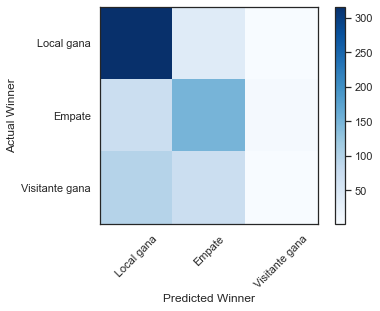

/Users/carlotasanchezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


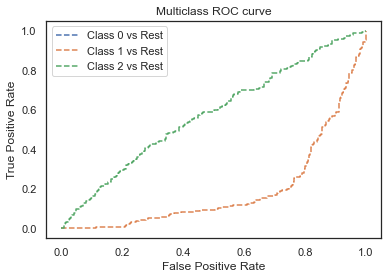

In [195]:
#Evaluación del modelo SVC con pipeline
# Get predictions from test data
predictions = multi_model_SVC.predict(x_test)
partidos_prob = multi_model_SVC.predict_proba(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(m, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(partido_classes))
plt.xticks(tick_marks, partido_classes, rotation=45)
plt.yticks(tick_marks, partido_classes)
plt.xlabel("Predicted Winner")
plt.ylabel("Actual Winner")
plt.show()

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(multi_model_SVC.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(multi_model_SVC.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24])])),
                ('regressor', RandomForestClassifier(random_state=42))])
Overall Accuracy: 0.6381842456608812
Overall Precision: 0.5538948374269291
Overall Recall: 0.5530200344807087
Average AUC: 0.7479972754561812


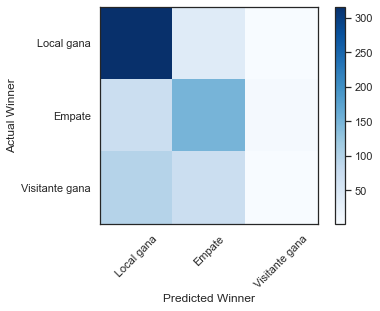

/Users/carlotasanchezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


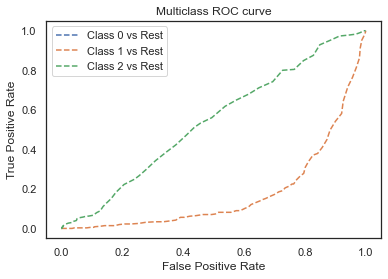

In [196]:
#pipeline con random forest
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestClassifier(n_estimators=100, random_state=42))])

multi_model_RF = pipeline.fit(x_train, y_train)
print (multi_model_RF)

#Evaluación del modelo Random Forest con pipeline
# Get predictions from test data
predictions = multi_model_RF.predict(x_test)
partidos_prob = multi_model_RF.predict_proba(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(m, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(partido_classes))
plt.xticks(tick_marks, partido_classes, rotation=45)
plt.yticks(tick_marks, partido_classes)
plt.xlabel("Predicted Winner")
plt.ylabel("Actual Winner")
plt.show()

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(multi_model_RF.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(multi_model_RF.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24])])),
                ('regressor', GradientBoostingClassifier())])
Overall Accuracy: 0.6528704939919893
Overall Precision: 0.574186667171341
Overall Recall: 0.5718295582902324
Average AUC: 0.7479972754561812


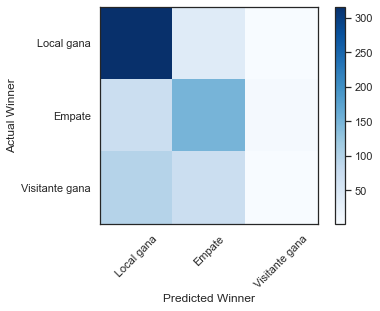

/Users/carlotasanchezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


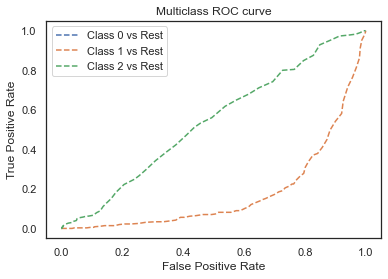

In [197]:
#pipeline con gradient boosting
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingClassifier())])

multi_model_GB = pipeline.fit(x_train, y_train)
print (multi_model_GB)

#Evaluación del modelo Gradient Boosting con pipeline
# Get predictions from test data
predictions = multi_model_GB.predict(x_test)
partidos_prob_prob = multi_model_GB.predict_proba(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(m, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(partido_classes))
plt.xticks(tick_marks, partido_classes, rotation=45)
plt.yticks(tick_marks, partido_classes)
plt.xlabel("Predicted Winner")
plt.ylabel("Actual Winner")
plt.show()

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(multi_model_GB.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(multi_model_GB.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24])])),
                ('regressor', GradientBoostingClassifier())])
Overall Accuracy: 0.6208277703604806
Overall Precision: 0.4476832199088112
Overall Recall: 0.5171235360561203
Average AUC: 0.7479972754561812


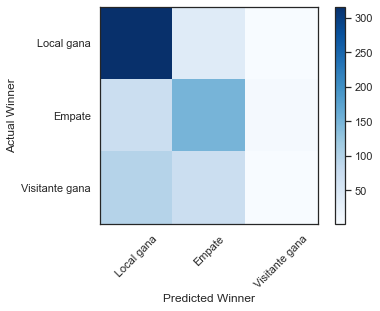

/Users/carlotasanchezgonzalez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


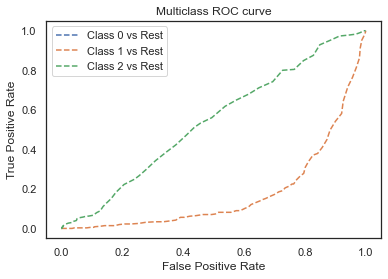

In [198]:
#pipeline con gradient boosting
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression())])

multi_model_LR = pipeline.fit(x_train, y_train)
print (multi_model_GB)

#Evaluación del modelo Gradient Boosting con pipeline
# Get predictions from test data
predictions = multi_model_LR.predict(x_test)
partidos_prob_prob = multi_model_LR.predict_proba(x_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_test,partidos_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(m, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(partido_classes))
plt.xticks(tick_marks, partido_classes, rotation=45)
plt.yticks(tick_marks, partido_classes)
plt.xlabel("Predicted Winner")
plt.ylabel("Actual Winner")
plt.show()

# Obtener métricas ROC para cada clase
fpr = {}
tpr = {}
thresh = {}
for i in range(len(multi_model_LR.classes_)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, partidos_prob[:, i], pos_label=i)
    
# Trazar la curva ROC
for i in range(len(multi_model_LR.classes_)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label='Class {} vs Rest'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

In [199]:
'''Evalaución de todos los modelos escalados, ya que tienen mejor rendimiento'''


modelos = {'Logistic Regression': multi_model_LR,
          'Random Forest': multi_model_RF,
          'Gradient Boosting': multi_model_GB,
          'SVM': multi_model_SVC}

# Crear un diccionario para almacenar las métricas de cada modelo
metricas = {}

# Iterar sobre cada modelo
for nombre, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(x_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    predicciones = modelo.predict(x_test)
    predicciones_proba = modelo.predict_proba(x_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, predicciones)
    precision = precision_score(y_test, predicciones, average='macro')
    recall = recall_score(y_test, predicciones, average='macro')
    roc_auc = roc_auc_score(y_test, predicciones_proba, multi_class='ovr')
    
    # Almacenar las métricas en el diccionario
    metricas[nombre] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'AUC': roc_auc}

# Crear un DataFrame a partir del diccionario de métricas
df_metricas = pd.DataFrame.from_dict(metricas, orient='index')

# Imprimir el DataFrame
df_metricas


,Accuracy,Precision,Recall,AUC
Logistic Regression,0.620828,0.447683,0.517124,0.744481
Random Forest,0.638184,0.553895,0.553020,0.747997
Gradient Boosting,0.654206,0.578150,0.573814,0.775710
SVM,0.627503,0.478725,0.523986,0.730595


Basándonos en estas métricas, podemos observar que el modelo de Gradient Boosting tiene el mejor desempeño general en términos de precisión, recall, accuracy y ROC AUC en comparación con los otros modelos.

In [200]:
#Voy a guardar los modelos para usarlos para predecir resultados de otros partidos
import joblib

# Guardar los modelos en un archivo
joblib.dump(multi_model_LR, 'modelos/multi_model_LR.pkl')
joblib.dump(multi_model_RF, 'modelos/multi_model_RF.pkl')
joblib.dump(multi_model_GB, 'modelos/multi_model_GB.pkl')
joblib.dump(multi_model_SVC, 'modelos/multi_model_SVC.pkl')


['modelos/multi_model_SVC.pkl']

In [201]:
#Cargo el data que quiero usar para las predicciones y me quedo con lo que necesito
data = pd.read_csv('dataframe/champions_23_24.csv', header=None, skiprows=1)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,2023-01-01,Group stage,2,307,Stadio Giuseppe Meazza,0,0,0,1,...,16.423147,20.00,33.33,0.00,66.67,0.20,0.33,1.20,385.648621,16.767331
1,2,2023-01-01,Group stage,67,68,Stadion Wankdorf,1,3,0,0,...,15.543811,42.86,50.00,0.00,50.00,0.43,0.50,1.57,497.803882,21.643647
2,3,2023-01-01,Group stage,16,20,Etihad Stadium,3,1,1,0,...,29.944842,0.00,0.00,33.33,66.67,0.00,0.00,1.20,374.821246,17.037329
3,4,2023-01-01,Group stage,28,14,Parc des Princes,2,0,1,0,...,33.267669,45.45,50.00,50.00,0.00,0.45,0.50,1.36,642.492339,27.934450
4,5,2023-01-01,Group stage,99,24,Stadio Olimpico,1,1,0,1,...,24.959872,55.56,80.00,0.00,20.00,0.56,0.80,2.44,677.936670,30.815303


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       124 non-null    int64  
 1   1       124 non-null    object 
 2   2       124 non-null    object 
 3   3       124 non-null    int64  
 4   4       124 non-null    int64  
 5   5       124 non-null    object 
 6   6       124 non-null    int64  
 7   7       124 non-null    int64  
 8   8       124 non-null    int64  
 9   9       124 non-null    int64  
 10  10      124 non-null    int64  
 11  11      124 non-null    float64
 12  12      124 non-null    float64
 13  13      124 non-null    float64
 14  14      124 non-null    float64
 15  15      124 non-null    float64
 16  16      124 non-null    float64
 17  17      124 non-null    float64
 18  18      124 non-null    float64
 19  19      124 non-null    float64
 20  20      124 non-null    float64
 21  21      124 non-null    float64
 22  22

In [203]:
data = data.drop([0, 1, 2, 5, 6, 7, 8, 9, 10], axis=1)
data.head()

,3,4,11,12,13,14,15,16,17,18,...,24,25,26,27,28,29,30,31,32,33
0,2,307,0.0,0.0,100.0,100.0,0.0,40.00,50.0,0.0,...,16.423147,20.00,33.33,0.00,66.67,0.20,0.33,1.20,385.648621,16.767331
1,67,68,100.0,0.0,0.0,0.0,100.0,20.00,50.0,0.0,...,15.543811,42.86,50.00,0.00,50.00,0.43,0.50,1.57,497.803882,21.643647
2,16,20,0.0,0.0,100.0,100.0,0.0,77.78,75.0,0.0,...,29.944842,0.00,0.00,33.33,66.67,0.00,0.00,1.20,374.821246,17.037329
3,28,14,40.0,60.0,0.0,20.0,20.0,36.36,40.0,40.0,...,33.267669,45.45,50.00,50.00,0.00,0.45,0.50,1.36,642.492339,27.934450
4,99,24,100.0,0.0,0.0,0.0,100.0,57.14,100.0,0.0,...,24.959872,55.56,80.00,0.00,20.00,0.56,0.80,2.44,677.936670,30.815303


In [204]:
#Predicciones con LR
multi_model_LR = joblib.load('modelos/multi_model_LR.pkl')

predicciones = multi_model_LR.predict(data)
nuevo_data = data.iloc[:, [0, 1]].copy()  # Selecciona las columnas 3 y 4 del DataFrame original
nuevo_data['LR'] = predicciones  # Agrega las predicciones como una nueva columna

# Imprimir las últimas 8 filas del nuevo DataFrame
print(nuevo_data.tail(8))


      3   4  LR
116   5  28   1
117  14  24   1
118  16   1   1
119   3  31   1
120   3   1   1
121  14  28   1
122  28  14   1
123   1   3   1


In [205]:
#Predicciones con LR
multi_model_RF = joblib.load('modelos/multi_model_RF.pkl')
predicciones_RF = multi_model_RF.predict(data)
nuevo_data['RF'] = predicciones_RF

# Imprimir las últimas 8 filas de las columnas seleccionadas
print(nuevo_data.tail(8))

      3   4  LR  RF
116   5  28   1   2
117  14  24   1   1
118  16   1   1   2
119   3  31   1   1
120   3   1   1   1
121  14  28   1   1
122  28  14   1   1
123   1   3   1   1


In [206]:
#Predicciones con GB
multi_model_GB = joblib.load('modelos/multi_model_GB.pkl')
predicciones_GB = multi_model_GB.predict(data)
nuevo_data['GB'] = predicciones_GB

nuevo_data.tail(8)

,3,4,LR,RF,GB
116,5,28,1,2,2
117,14,24,1,1,1
118,16,1,1,2,3
119,3,31,1,1,1
120,3,1,1,1,1
121,14,28,1,1,1
122,28,14,1,1,1
123,1,3,1,1,3


In [207]:
#Predicciones con SVC
multi_model_SVC = joblib.load('modelos/multi_model_SVC.pkl')
predicciones_SVC = multi_model_SVC.predict(data)
nuevo_data['SVC'] = predicciones_SVC

nuevo_data.tail(8)

,3,4,LR,RF,GB,SVC
116,5,28,1,2,2,2
117,14,24,1,1,1,1
118,16,1,1,2,3,1
119,3,31,1,1,1,1
120,3,1,1,1,1,1
121,14,28,1,1,1,1
122,28,14,1,1,1,1
123,1,3,1,1,3,1


In [208]:
import json

# Cargar el JSON que contiene la correspondencia entre IDs de equipos y nombres
with open('dataframe/id_equipo.json', 'r') as f:
    id_equipos = json.load(f)

# Crear un diccionario para facilitar el mapeo
id_to_equipo = {str(value): key for key, value in id_equipos.items()}



In [209]:
# Reemplazar los IDs de equipos en las columnas correspondientes de nuevo_data con los nombres de los equipos
nuevo_data[3] = nuevo_data[3].astype(str).map(id_to_equipo)
nuevo_data[4] = nuevo_data[4].astype(str).map(id_to_equipo)

# Imprimir las últimas 8 filas con los nombres de los equipos en lugar de los IDs
nuevo_data.tail(10)

,3,4,LR,RF,GB,SVC
114,Atlético de Madrid,Borussia Dortmund,1,1,1,1
115,PSG,Barcelona,1,1,1,1
116,Barcelona,PSG,1,2,2,2
117,Borussia Dortmund,Atlético de Madrid,1,1,1,1
118,Manchester City,Real Madrid,1,2,3,1
119,Bayern München,Arsenal,1,1,1,1
120,Bayern München,Real Madrid,1,1,1,1
121,Borussia Dortmund,PSG,1,1,1,1
122,PSG,Borussia Dortmund,1,1,1,1
123,Real Madrid,Bayern München,1,1,3,1
